In [1]:
import numpy as np
import pandas as pd
from astroquery.gaia import Gaia
import matplotlib.pyplot as plt
from astropy.table import Column, join, Table
from astropy.io import ascii
from HMXB_pipeline_class import pipeline
import astropy.coordinates as coords
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.visualization import astropy_mpl_style

In [2]:
#constants
k  = 4.74 #km/s per mas/yr 

#solar values
# solar motion km/s 
# M. Carretero-Castrillo 2023 and Ried 2019
#km/s
U_sun = 10.8
V_sun = 13.6
W_sun = 7.6

global U_sun, V_sun, W_sun, k

# Read the Data
## DO NOT EDIT THIS FILE

In [3]:
HMXB_gaia = ascii.read('GAIA_HMXB_DNE.ecsv',format='ecsv')
HMXB_gaia

source_id,ra,ra_error,dec,dec_error,pmra,pmra_error,pmdec,pmdec_error,parallax,parallax_error,radial_velocity,radial_velocity_error,phot_g_mean_mag,l,b,phot_bp_mean_mag,phot_rp_mean_mag,bp_rp
,deg,mas,deg,mas,mas / yr,mas / yr,mas / yr,mas / yr,mas,mas,km / s,km / s,mag,deg,deg,mag,mag,mag
int64,float64,float32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32,float32,float64,float64,float32,float32,float32
168450545792009600,58.84615062234396,0.029553613,31.045836091857545,0.020791648,-1.282117252826291,0.053073816,-1.8690907560201113,0.030308086,1.627402622661778,0.03745641,nan,nan,6.261697,163.0813533466715,-17.136203125538678,6.4398537,5.93006,0.50979376
184497471323752064,80.64680481184236,0.025397874,37.6759929364201,0.019576473,1.3049449567151956,0.040826127,-3.9994793622028038,0.028048873,0.7213697567669315,0.030094078,nan,nan,7.231733,170.05338802722687,0.7103172589013076,7.376429,6.921238,0.45519114
252878401557369088,70.24720739300419,0.011905987,44.53034418647852,0.008385959,0.10064623612212906,0.016362276,-1.186127754569379,0.013658521,0.378823380551682,0.015042702,nan,nan,10.403856,159.8470955000755,-1.2700235829277626,10.832097,9.790907,1.0411901
276644757710014976,64.92556123476727,0.012604313,55.999360679043434,0.008108321,-0.4735607216045463,0.018276569,-0.5096656032780096,0.013492867,0.2100882458297216,0.014864282,nan,nan,10.766115,149.17651611413766,4.133059262254314,11.439369,9.855047,1.584322
414196617287885312,18.996040698840275,0.010982572,59.15394486765568,0.012779636,-2.4625832668630094,0.014893881,-0.546486466252775,0.016773285,0.3391933399322079,0.01803902,nan,nan,11.412056,126.08000772759438,-3.5676859152271287,11.667166,10.951165,0.71600056
426558460884582016,14.177450998208093,1.8335997,60.71672280471204,2.3911946,nan,nan,nan,nan,nan,nan,nan,nan,2.0645833,123.57698659515256,-2.1484240190698634,2.7258432,2.3151085,0.41073465
427234969757165952,9.290132580203235,0.008413794,61.36013319063004,0.009818237,-1.7956235405295953,0.010947091,-0.5251300483100196,0.013608978,0.27189066538368456,0.012059882,nan,nan,9.454656,121.22141620023214,-1.4641898756122689,9.768971,8.949126,0.8198452
444752973131169664,53.749629724978455,0.013929484,53.17313997828423,0.012730369,-0.26805266659388,0.019742586,0.4401283844933388,0.019827945,0.13434727271763658,0.020151323,nan,nan,14.200214,146.05208942276994,-2.1940257086354467,15.475269,13.086571,2.3886986


In [4]:
HMXB_pipeline = pipeline('GAIA_HMXB_DNE.ecsv', fmt='ecsv')
HMXB_table = HMXB_pipeline.lay_pipe(filename='HMXB_with_analysis.ecsv',filetype='ascii.ecsv')

In [5]:
HMXB_table

source_id,ra,ra_error,dec,dec_error,pmra,pmra_error,pmdec,pmdec_error,parallax,parallax_error,radial_velocity,radial_velocity_error,phot_g_mean_mag,l,b,phot_bp_mean_mag,phot_rp_mean_mag,bp_rp,distance,pm_l_poleski,pm_b_poleski,galactic distance,circular velocity,LSR velocity,mu_l_sol,mu_b_sol,mu_l_rot,mu_b_rot,Peculiar Velocity
,deg,mas,deg,mas,mas / yr,mas / yr,mas / yr,mas / yr,mas,mas,km / s,km / s,mag,deg,deg,mag,mag,mag,kpc,mas / yr,mas / yr,kpc,km / s,km / s,mas / yr,mas / yr,mas / yr,mas / yr,km / s
int64,float64,float32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32,float32,float64,float64,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
168450545792009600,58.84615062234396,0.029553613,31.045836091857545,0.020791648,-1.282117252826291,0.053073816,-1.8690907560201113,0.030308086,1.627402622661778,0.03745641,nan,nan,6.261697,163.0813533466715,-17.136203125538678,6.4398537,5.93006,0.50979376,0.6144760897364175,0.3095889769659371,-2.245323934218814,9.063394189676286,223.81506681128036,57.77572175230654,5.54632682187915,-1.8486200400580908,-0.4202484622115612,-0.4025983375739546,14.02859774983416
184497471323752064,80.64680481184236,0.025397874,37.6759929364201,0.019576473,1.3049449567151956,0.040826127,-3.9994793622028038,0.028048873,0.7213697567669315,0.030094078,nan,nan,7.231733,170.05338802722687,0.7103172589013076,7.376429,6.921238,0.45519114,1.3862516284046154,4.038422032220199,-1.1789249333274139,9.868215163177801,224.56128708057972,33.03724050675546,2.322547203858686,-1.1721755380409382,-0.1306188566067849,0.009940439865081115,12.133496727382866
252878401557369088,70.24720739300419,0.011905987,44.53034418647852,0.008385959,0.10064623612212906,0.016362276,-1.186127754569379,0.013658521,0.378823380551682,0.015042702,nan,nan,10.403856,159.8470955000755,-1.2700235829277626,10.832097,9.790907,1.0411901,2.639752590095405,0.9593255549561471,-0.7047859211231655,11.015119773159219,225.5294017486117,59.20502188807201,1.3177498233849931,-0.597587187998077,-0.4438073449784902,-0.030656812265844154,1.434785114595448
276644757710014976,64.92556123476727,0.012604313,55.999360679043434,0.008108321,-0.4735607216045463,0.018276569,-0.5096656032780096,0.013492867,0.2100882458297216,0.014864282,nan,nan,10.766115,149.17651611413766,4.133059262254314,11.439369,9.855047,1.584322,4.759904563202022,0.02670675915560328,-0.6952017931699837,12.810032757999913,226.8654620531654,75.83556855602039,0.7629157021820535,-0.3433404950633777,-0.7985036619761263,0.12115839202699431,10.764396229063566
414196617287885312,18.996040698840275,0.010982572,59.15394486765568,0.012779636,-2.4625832668630094,0.014893881,-0.546486466252775,0.016773285,0.3391933399322079,0.01803902,nan,nan,11.412056,126.08000772759438,-3.5676859152271287,11.667166,10.951165,0.71600056,2.9481710938070385,-2.3920245855272095,-0.800738525527853,10.505550935625854,225.1118353299879,145.18545631063174,1.197749379234627,-0.5634229362770962,-2.644620505556004,-0.1511493220972492,13.262661170839669
426558460884582016,14.177450998208093,1.8335997,60.71672280471204,2.3911946,nan,nan,nan,nan,nan,nan,nan,nan,2.0645833,123.57698659515256,-2.1484240190698634,2.7258432,2.3151085,0.41073465,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
427234969757165952,9.290132580203235,0.008413794,61.36013319063004,0.009818237,-1.7956235405295953,0.010947091,-0.5251300483100196,0.013608978,0.27189066538368456,0.012059882,nan,nan,9.454656,121.22141620023214,-1.4641898756122689,9.768971,8.949126,0.8198452,3.677948996847052,-1.8178140519374264,-0.4422414945716403,10.870491734584071,225.41280416340064,148.84601654902679,0.934142743735759,-0.4446418257894607,-2.8427897106767976,-0.06013234426507411,1.922506718205155
444752973131169664,53.749629724978455,0.013929484,53.17313997828423,0.012730369,-0.26805266659388,0.019742586,0.4401283844933388,0.019827945,0.13434727271763658,0.020151323,nan,nan,14.200214,146.05208942276994,-

# Add Spectral Type- Match by GAIA DR3 Identifer

In [6]:
HMSP_type = ascii.read('HMXB_sptype.csv',format='csv')
HMSP_type['GaiaDR3'].name= 'source_id'
HMSP_type = HMSP_type[~HMSP_type['source_id'].mask]
#HMSP_type
HMXB_table = join(HMXB_table, HMSP_type,keys='source_id')

In [7]:
HMXB_table

source_id,ra,ra_error,dec,dec_error,pmra,pmra_error,pmdec,pmdec_error,parallax,parallax_error,radial_velocity,radial_velocity_error,phot_g_mean_mag,l,b,phot_bp_mean_mag,phot_rp_mean_mag,bp_rp,distance,pm_l_poleski,pm_b_poleski,galactic distance,circular velocity,LSR velocity,mu_l_sol,mu_b_sol,mu_l_rot,mu_b_rot,Peculiar Velocity,SpType
,deg,mas,deg,mas,mas / yr,mas / yr,mas / yr,mas / yr,mas,mas,km / s,km / s,mag,deg,deg,mag,mag,mag,kpc,mas / yr,mas / yr,kpc,km / s,km / s,mas / yr,mas / yr,mas / yr,mas / yr,km / s,
int64,float64,float32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32,float32,float64,float64,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str21
168450545792009600,58.84615062234396,0.029553613,31.045836091857545,0.020791648,-1.282117252826291,0.053073816,-1.8690907560201113,0.030308086,1.627402622661778,0.03745641,nan,nan,6.261697,163.0813533466715,-17.136203125538678,6.4398537,5.93006,0.50979376,0.6144760897364175,0.3095889769659371,-2.245323934218814,9.063394189676286,223.81506681128036,57.77572175230654,5.54632682187915,-1.8486200400580908,-0.4202484622115612,-0.4025983375739546,14.02859774983416,B0Ve
184497471323752064,80.64680481184236,0.025397874,37.6759929364201,0.019576473,1.3049449567151956,0.040826127,-3.9994793622028038,0.028048873,0.7213697567669315,0.030094078,nan,nan,7.231733,170.05338802722687,0.7103172589013076,7.376429,6.921238,0.45519114,1.3862516284046154,4.038422032220199,-1.1789249333274139,9.868215163177801,224.56128708057972,33.03724050675546,2.322547203858686,-1.1721755380409382,-0.1306188566067849,0.009940439865081115,12.133496727382866,B0 IVpe
252878401557369088,70.24720739300419,0.011905987,44.53034418647852,0.008385959,0.10064623612212906,0.016362276,-1.186127754569379,0.013658521,0.378823380551682,0.015042702,nan,nan,10.403856,159.8470955000755,-1.2700235829277626,10.832097,9.790907,1.0411901,2.639752590095405,0.9593255549561471,-0.7047859211231655,11.015119773159219,225.5294017486117,59.20502188807201,1.3177498233849931,-0.597587187998077,-0.4438073449784902,-0.030656812265844154,1.434785114595448,B0e
276644757710014976,64.92556123476727,0.012604313,55.999360679043434,0.008108321,-0.4735607216045463,0.018276569,-0.5096656032780096,0.013492867,0.2100882458297216,0.014864282,nan,nan,10.766115,149.17651611413766,4.133059262254314,11.439369,9.855047,1.584322,4.759904563202022,0.02670675915560328,-0.6952017931699837,12.810032757999913,226.8654620531654,75.83556855602039,0.7629157021820535,-0.3433404950633777,-0.7985036619761263,0.12115839202699431,10.764396229063566,B1/2I[e]
414196617287885312,18.996040698840275,0.010982572,59.15394486765568,0.012779636,-2.4625832668630094,0.014893881,-0.546486466252775,0.016773285,0.3391933399322079,0.01803902,nan,nan,11.412056,126.08000772759438,-3.5676859152271287,11.667166,10.951165,0.71600056,2.9481710938070385,-2.3920245855272095,-0.800738525527853,10.505550935625854,225.1118353299879,145.18545631063174,1.197749379234627,-0.5634229362770962,-2.644620505556004,-0.1511493220972492,13.262661170839669,B1-2 III/Ve
426558460884582016,14.177450998208093,1.8335997,60.71672280471204,2.3911946,nan,nan,nan,nan,nan,nan,nan,nan,2.0645833,123.57698659515256,-2.1484240190698634,2.7258432,2.3151085,0.41073465,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,B0.5IVpe
427234969757165952,9.290132580203235,0.008413794,61.36013319063004,0.009818237,-1.7956235405295953,0.010947091,-0.5251300483100196,0.013608978,0.27189066538368456,0.012059882,nan,nan,9.454656,121.22141620023214,-1.4641898756122689,9.768971,8.949126,0.8198452,3.677948996847052,-1.8178140519374264,-0.4422414945716403,10.870491734584071,225.41280416340064,148.84601654902679,0.934142743735759,-0.4446418257894607,-2.8427897106767976,-0.06013234426507411,1.922506718205155,BN0.5II-III / BN0.7Ib
444752973131169664,53.749629724978455,0.013929484,53.17313997828423,0.012730369,-0.26805266659388,0.019742586,0.4401283844933388

# Make the Peculiar Velocity function using moffat 1998 

In [8]:
def sp_color(sptype):
        sptype  = str(sptype)
        if sptype == None or sptype == '':
            return 'black'
        if sptype.startswith('O'):
             return 'blue'
        elif sptype.startswith('B') and (sptype.endswith('e') or '[e]' in sptype):
            return 'green'
        elif sptype.startswith('B'):
            return 'red'
        else:
            return 'black'
HMXB_table['SpColor'] = [sp_color(sptype) for sptype in HMXB_table['SpType']]

In [9]:
len(HMXB_table)

121

# Make a histrogram and plot the data

In [10]:
HMXB_table['SpType']

B0Ve
B0 IVpe
B0e
B1/2I[e]
B1-2 III/Ve
B0.5IVpe
BN0.5II-III / BN0.7Ib
O8-9Ve
O9.5Ve
B0Ve
B1III-Ve


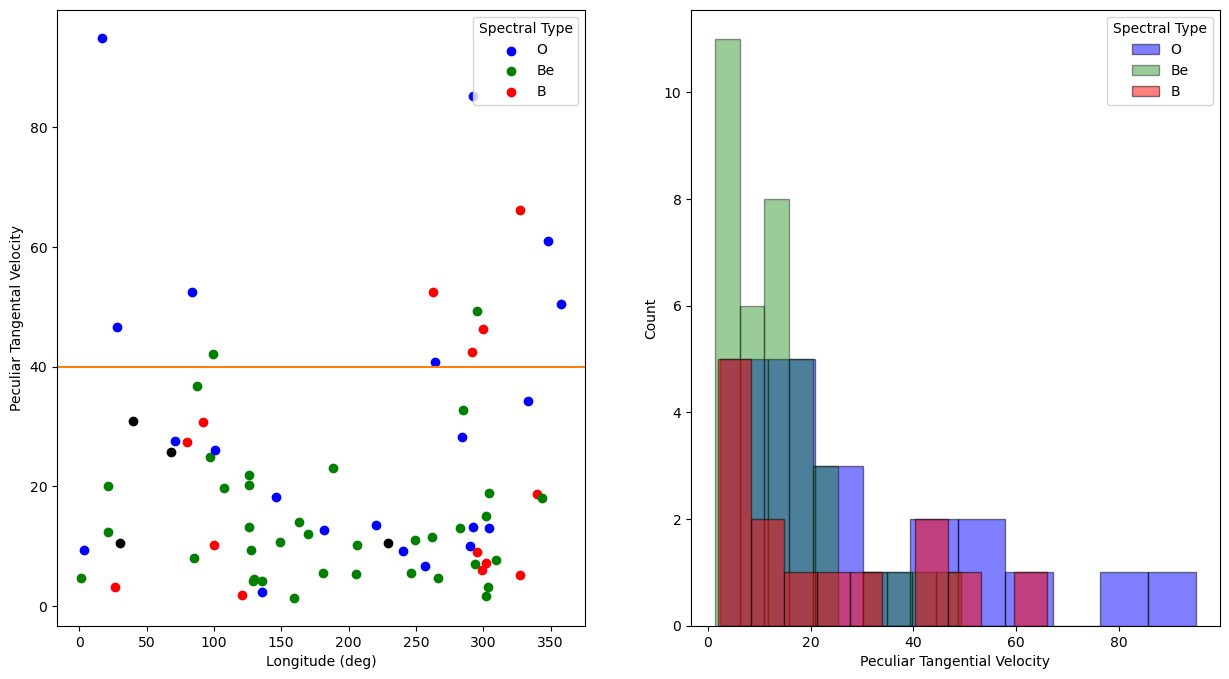

In [11]:
def plot_peculiar(table):
    #large_mask = table['Peculiar Velocity'] <= 400
   # table = table[large_mask]
    v_thres = 40 #km/s threshold peculiar velocity
    prlx_mask = table['parallax']/table['parallax_error'] >=5.0
    table = table[prlx_mask] 
    
    V_pec = table['Peculiar Velocity']
    long = table['l']
    color = table['SpColor']
    

    fig, axs = plt.subplots(1,2, figsize=(15,8))
    for long_data, V_pec_data, color in zip(long, V_pec, color):
        axs[0].scatter(long_data, V_pec_data,c=color)
    axs[0].scatter([], [], color='blue', label='O')
    axs[0].scatter([], [], color='green', label='Be')
    axs[0].scatter([], [], color='red', label='B')

    axs[0].set_xlabel('Longitude (deg)')
    axs[0].set_ylabel("Peculiar Tangental Velocity")
    axs[0].axhline(y=v_thres,color='tab:orange')
    axs[0].legend(title='Spectral Type')
    #axs[0].set_ylim(-200,200)

    #histrogram
    # Filter V_pec values based on star types
    blue_mask = table['SpColor'] == 'blue'
    red_mask = table['SpColor'] == 'red'
    green_mask = table['SpColor'] == 'green'
    
    V_pec_O = table['Peculiar Velocity'][blue_mask]
    V_pec_Be = table['Peculiar Velocity'][green_mask]
    V_pec_B =  table['Peculiar Velocity'][red_mask]
    #print(len(V_pec_O),len(V_pec_Be),len(V_pec_B))
    # Histogram for V_pec based on star type
    bin_size = 10
    axs[1].hist(V_pec_O, bins=bin_size,  alpha=0.5, edgecolor='black', color='blue', label='O')
    axs[1].hist(V_pec_Be, bins=bin_size, alpha=0.4, edgecolor='black', color='green', label='Be')
    axs[1].hist(V_pec_B, bins= bin_size, alpha=0.5, edgecolor='black', color='red', label='B')
    
    axs[1].set_ylabel("Count")
    axs[1].set_xlabel('Peculiar Tangential Velocity')
    axs[1].legend(title="Spectral Type")

   # fig.colorbar(v_pec_plot,label='bp_rp')
    return None
plot_peculiar(HMXB_table)

In [12]:
max_vpec_mask =HMXB_table['Peculiar Velocity'].argmax()
max_vpec_data = HMXB_table[max_vpec_mask]
max_vpec_data

source_id,ra,ra_error,dec,dec_error,pmra,pmra_error,pmdec,pmdec_error,parallax,parallax_error,radial_velocity,radial_velocity_error,phot_g_mean_mag,l,b,phot_bp_mean_mag,phot_rp_mean_mag,bp_rp,distance,pm_l_poleski,pm_b_poleski,galactic distance,circular velocity,LSR velocity,mu_l_sol,mu_b_sol,mu_l_rot,mu_b_rot,Peculiar Velocity,SpType,SpColor
,deg,mas,deg,mas,mas / yr,mas / yr,mas / yr,mas / yr,mas,mas,km / s,km / s,mag,deg,deg,mag,mag,mag,kpc,mas / yr,mas / yr,kpc,km / s,km / s,mas / yr,mas / yr,mas / yr,mas / yr,km / s,,
int64,float64,float32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32,float32,float64,float64,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str21,str5
426558460884582016,14.177450998208093,1.8335997,60.71672280471204,2.3911946,nan,nan,nan,nan,nan,nan,nan,nan,2.0645833,123.57698659515256,-2.1484240190698634,2.7258432,2.3151085,0.41073465,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,B0.5IVpe,green


# Mask negative Parallax

In [13]:
mask = HMXB_table['Peculiar Velocity'] <= 400
non_neg_HMXB_table = HMXB_table[mask]
negative_mask = non_neg_HMXB_table["Peculiar Velocity"] >= 0
non_neg_HMXB_table = non_neg_HMXB_table[negative_mask]

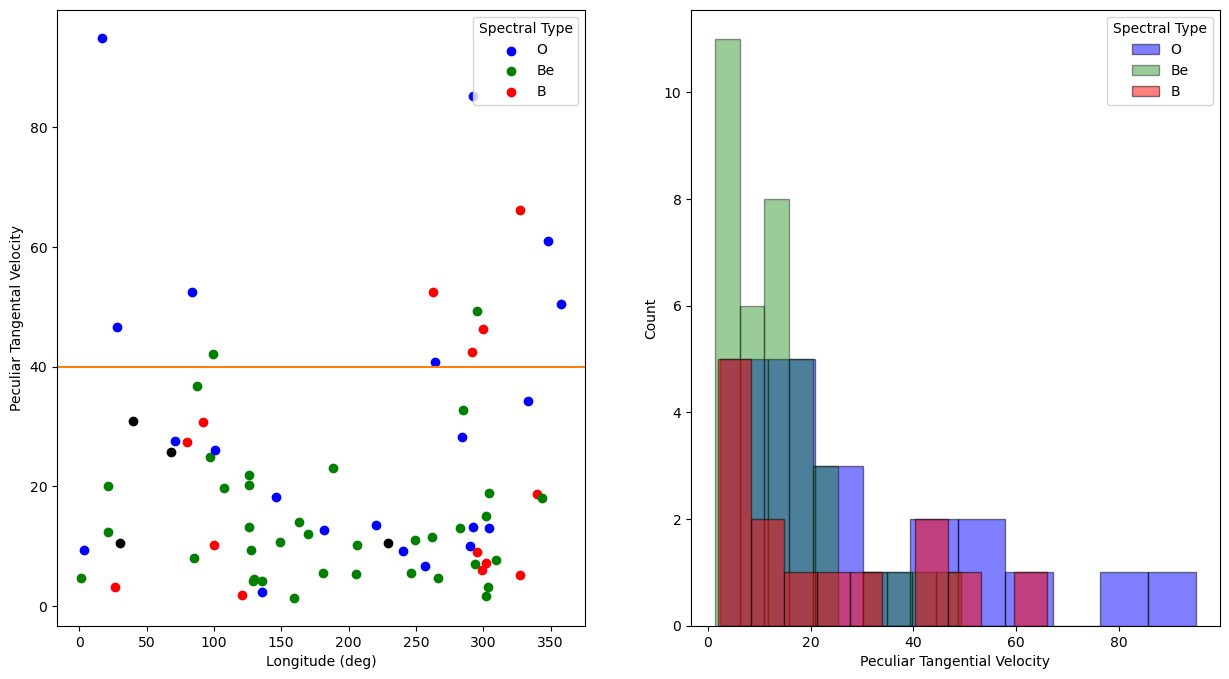

In [14]:
len(non_neg_HMXB_table)
plot_peculiar(non_neg_HMXB_table)

In [15]:
negative_parallax_mask = HMXB_table['parallax'] <=0
negative_parallax = HMXB_table[negative_parallax_mask]
negative_parallax_ID = negative_parallax['source_id']
str_negative_parallax = ','.join(map(str,negative_parallax_ID))
str_negative_parallax

'4070968778561141760,4256500538116700160,4310118570535453696,4512787627579740032,5882543824607819776,5883218164517055488,5940576971716473344,5940777877435137024'

# Folloiwing Bailler Jones GAIA Dr3

https://dc.zah.uni-heidelberg.de/__system__/adql/query/form

These are sources with negative parallax
17 sources became 8

SELECT source_id, r_med_geo
FROM gedr3dist.main
 JOIN gaia.edr3lite USING(source_id)
WHERE source_id in (2028089540103670144,2070085317968809216,4040960662373474176,4070968778561141760,4256500538116700160,4306419980916246656,4309253392325650176,4310118570535453696,4310649153642824320,4512787627579740032,5854175187680510336,5882543824607819776,5883218164517055488,5934776158877214848,5940576971716473344,5940777877435137024,5980409632300781056)

# Exporting table

In [16]:
HMXB_table.write("HMXB_practice_analysis.csv",format='csv',overwrite=True)

#export with units
HMXB_table.write('HMXB_practice_analysis.ecsv', format='ascii.ecsv',overwrite=True)

# Check Data with HD153919
This is also a good check to see if my pipeline class works

In [17]:
# verify_pipeline = pipeline('GAIA_HMXB_DNE.ecsv', fmt='ecsv')
# verify_table = verify_pipeline.lay_pipe(filename='HMXB_with_analysis.ecsv',filetype='ascii.ecsv')

In [18]:
#HD153919_read = ascii.read("HD153919-result.ecsv",format='ecsv')
verify_pipeline = pipeline('HD153919-result.ecsv',fmt='ecsv')
HD153919= verify_pipeline.lay_pipe(filename='HD153919-result.ecsv',filetype='ascii.ecsv')

In [19]:
HD153919


source_id,ra,ra_error,dec,dec_error,pmra,pmra_error,parallax_over_error,pmdec,pmdec_error,parallax,parallax_error,radial_velocity,radial_velocity_error,phot_g_mean_mag,l,b,phot_bp_mean_mag,phot_rp_mean_mag,bp_rp,distance,pm_l,pm_b,galactic distance,circular velocity,LSR velocity,mu_l_sol,mu_b_sol,mu_l_rot,mu_b_rot,Peculiar Velocity,pm_l_poleski,pm_b_poleski
,deg,mas,deg,mas,mas / yr,mas / yr,,mas / yr,mas / yr,mas,mas,km / s,km / s,mag,deg,deg,mag,mag,mag,kpc,mas / yr,mas / yr,kpc,km / s,km / s,mas / yr,mas / yr,mas / yr,mas / yr,km / s,mas / yr,mas / yr
int64,float64,float32,float64,float32,float64,float32,float32,float64,float32,float64,float32,float32,float32,float32,float64,float64,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
5976382915813535232,255.9865659301791,0.021049444,-37.8441202722809,0.012138224,2.4137032635492046,0.02806476,24.383919,5.021949969731823,0.021347089,0.6117358617075664,0.025948899,nan,nan,6.4204698,347.75444710988126,2.173492429913019,6.5759535,6.0885863,0.48736715,1.6346924589456862,5.455603348660082,1.1324032166355134,6.912338733878605,221.4552103876003,-57.26304804186743,-2.0108902079289996,-0.9425966257345032,-0.33697268535874947,0.05245861863101116,62.45548401686189,5.459355496184255,1.114173464609666


In [100]:
HD3879_pipeline = pipeline('HD 36879-result.ecsv',fmt='ecsv')
HD3879 =  HD3879_pipeline.lay_pipe(filename='HD 36879.ecsv',filetype='ascii.ecsv')
HD3879

source_id,ra,ra_error,dec,dec_error,pmra,pmra_error,parallax_over_error,pmdec,pmdec_error,parallax,parallax_error,radial_velocity,radial_velocity_error,phot_g_mean_mag,l,b,phot_bp_mean_mag,phot_rp_mean_mag,bp_rp,distance,pm_l_poleski,pm_b_poleski,galactic distance,circular velocity,LSR velocity,mu_l_sol,mu_b_sol,mu_l_rot,mu_b_rot,Peculiar Velocity
,deg,mas,deg,mas,mas / yr,mas / yr,,mas / yr,mas / yr,mas,mas,km / s,km / s,mag,deg,deg,mag,mag,mag,kpc,mas / yr,mas / yr,kpc,km / s,km / s,mas / yr,mas / yr,mas / yr,mas / yr,km / s
int64,float64,float32,float64,float32,float64,float32,float32,float64,float32,float64,float32,float32,float32,float32,float64,float64,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
3402983608883878016,83.91883273030244,0.025106044,21.403216892388098,0.018456262,-5.776275982999248,0.032617416,17.74445,-8.674329760453169,0.018755654,0.5456454172073251,0.030750202,nan,nan,7.496802,185.2194746127933,-5.886356704932575,7.5702705,7.292832,0.27743864,1.8326920165812315,4.264996458243135,-9.508899317798617,10.316802645383326,224.95220991995055,-16.577217662912354,1.4459742272109077,-0.7286825185029623,-0.033955068693427924,0.04160834980306812,80.54272807316016


In [107]:
HD153919['name'] = 'HD153919'
HD3879['name']= 'HD36879'
HD153919['name'].value[0]

np.str_('HD153919')

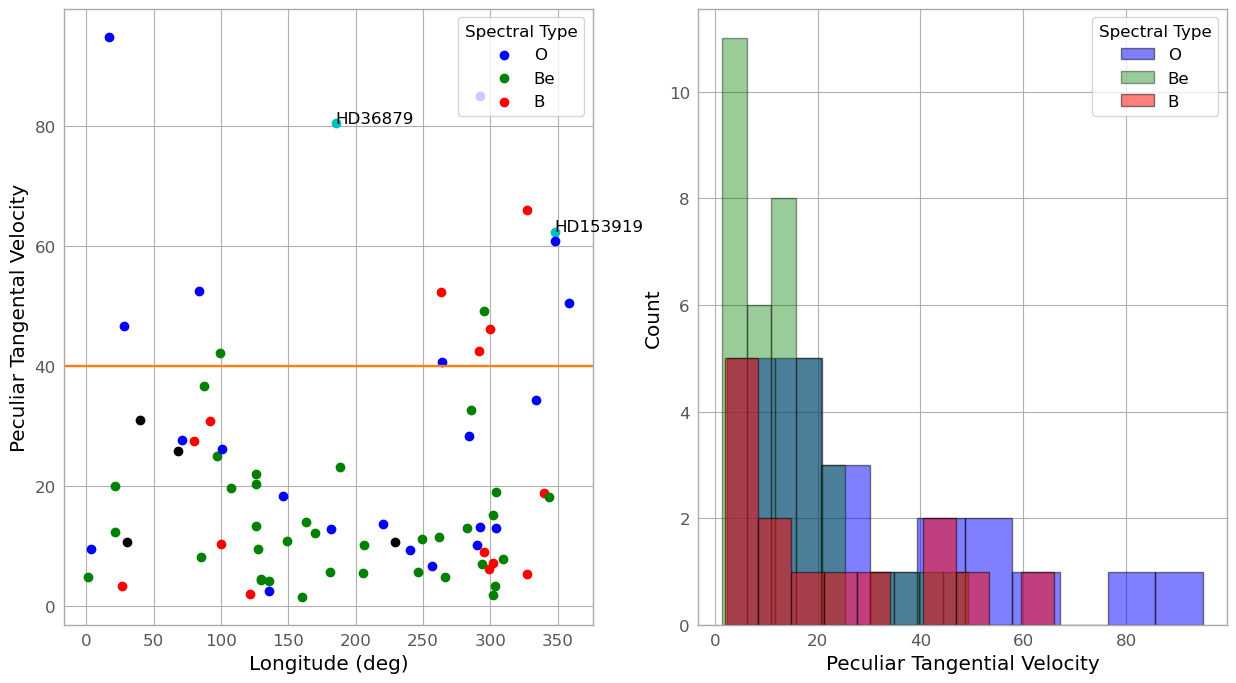

In [108]:
def plot_comparison(table, other_stars):
    large_mask = table['Peculiar Velocity'] <= 400
    table = table[large_mask]
    negative_mask = table['Peculiar Velocity'] >= 0
    table = table[negative_mask]
    prlx_mask = table['parallax']/table['parallax_error'] >=5.0
    table = table[prlx_mask] 
    V_pec = table['Peculiar Velocity']
    long = table['l']
    color = table['SpColor']
    v_thres = 40 #km/s threshold peculiar velocity
    #mask large ass values in the table
    # large_mask = table['Peculiar Velocity'] <= 400
    # table = table[large_mask]

    other_color = 'c'
    fig, axs = plt.subplots(1,2, figsize=(15,8))
    for i, star in enumerate(other_stars):
        star_v_pec = star['Peculiar Velocity']
        star_long = star['l']
        star_name = str(star['name'].value[0])
        axs[0].scatter(star_long,star_v_pec,c=other_color)
        axs[0].annotate(f'{star_name}',(star_long,star_v_pec))
    for long_data, V_pec_data, color in zip(long, V_pec, color):
        axs[0].scatter(long_data, V_pec_data,c=color)
    axs[0].scatter([], [], color='blue', label='O')
    axs[0].scatter([], [], color='green', label='Be')
    axs[0].scatter([], [], color='red', label='B')

    axs[0].set_xlabel('Longitude (deg)')
    axs[0].set_ylabel("Peculiar Tangental Velocity")
    axs[0].axhline(y=v_thres,color='tab:orange')
    axs[0].legend(title='Spectral Type')
    #axs[0].set_ylim(-200,200)

    #histrogram
    # Filter V_pec values based on star types
    blue_mask = table['SpColor'] == 'blue'
    red_mask = table['SpColor'] == 'red'
    green_mask = table['SpColor'] == 'green'
    
    V_pec_O = table['Peculiar Velocity'][blue_mask]
    V_pec_Be = table['Peculiar Velocity'][green_mask]
    V_pec_B =  table['Peculiar Velocity'][red_mask]
    #print(len(V_pec_O),len(V_pec_Be),len(V_pec_B))
    # Histogram for V_pec based on star type
    bin_size = 10
    axs[1].hist(V_pec_O, bins=bin_size,  alpha=0.5, edgecolor='black', color='blue', label='O')
    axs[1].hist(V_pec_Be, bins=bin_size, alpha=0.4, edgecolor='black', color='green', label='Be')
    axs[1].hist(V_pec_B, bins= bin_size, alpha=0.5, edgecolor='black', color='red', label='B')
    
    axs[1].set_ylabel("Count")
    axs[1].set_xlabel('Peculiar Tangential Velocity')
    axs[1].legend(title="Spectral Type")
    plt.show()
   # fig.colorbar(v_pec_plot,label='bp_rp')
    return None
list_of_comp_stars = [HD153919, HD3879]
plot_comparison(HMXB_table, list_of_comp_stars)

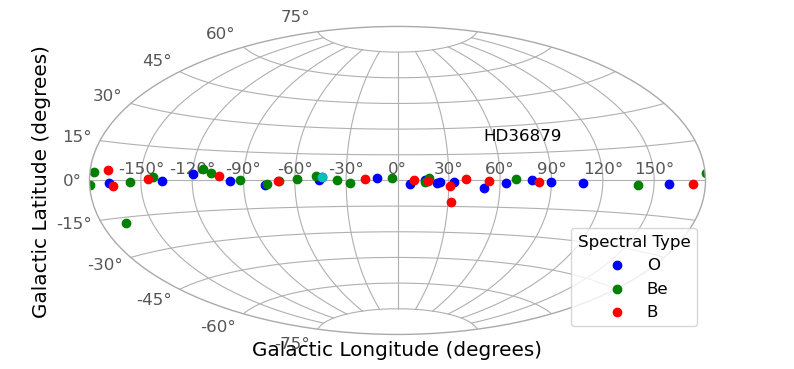

In [110]:
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
def plot_galactic_map(table,other_stars):
    '''FIX LATER MAKE GALACTIC SKYCOORD FOR EACH OBJECT'''
    
    gal_l , gal_b= table['l'],table['b']
    
    fig, ax  = plt.subplots(1,figsize=(10,4))
    blue_mask = table['SpColor'] == 'blue'
    red_mask = table['SpColor'] == 'red'
    green_mask = table['SpColor'] == 'green'
    
    l_pec_O = table['l'][blue_mask]
    l_pec_Be = table['l'][green_mask]
    l_pec_B =  table['l'][red_mask]

    b_pec_O = table['b'][blue_mask]
    b_pec_Be = table['b'][green_mask]
    b_pec_B =  table['b'][red_mask]

    #check with HD153919

    plt.axis('off')
    fig.add_subplot(111, projection = 'aitoff')
    
        
    plt.scatter(np.radians(l_pec_O * 180), np.radians(b_pec_O), c='b', label='O')
    plt.scatter(np.radians(l_pec_Be * 180), np.radians(b_pec_Be), c='g', label='Be')
    plt.scatter(np.radians(l_pec_B * 180), np.radians(b_pec_B), c='r', label='B')
    for i, star in enumerate(other_stars):
        star_lat = star['b']
        star_long = star['l']
        star_name = str(star['name'].value[0])
        plt.annotate(f'{star_name}',(star_long*180,star_lat))
        plt.scatter(np.radians(star_long*180), np.radians(star_lat),c='c' )
    plt.legend(title='Spectral Type',loc=4)
    
    # Set labels for axes
    plt.xlabel('Galactic Longitude (degrees)')
    plt.ylabel('Galactic Latitude (degrees)')
    ax.grid(True)
    plt.show()
plot_galactic_map(HMXB_table,list_of_comp_stars)   

# Be Stars
Find all the Be stars and hopefully their spin periods

In [23]:
Bestars_color_mask =HMXB_table['SpColor'] =='green'
Bestars = HMXB_table[Bestars_color_mask]
Bestars

source_id,ra,ra_error,dec,dec_error,pmra,pmra_error,pmdec,pmdec_error,parallax,parallax_error,radial_velocity,radial_velocity_error,phot_g_mean_mag,l,b,phot_bp_mean_mag,phot_rp_mean_mag,bp_rp,distance,pm_l_poleski,pm_b_poleski,galactic distance,circular velocity,LSR velocity,mu_l_sol,mu_b_sol,mu_l_rot,mu_b_rot,Peculiar Velocity,SpType,SpColor
,deg,mas,deg,mas,mas / yr,mas / yr,mas / yr,mas / yr,mas,mas,km / s,km / s,mag,deg,deg,mag,mag,mag,kpc,mas / yr,mas / yr,kpc,km / s,km / s,mas / yr,mas / yr,mas / yr,mas / yr,km / s,,
int64,float64,float32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32,float32,float64,float64,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str21,str5
168450545792009600,58.84615062234396,0.029553613,31.045836091857545,0.020791648,-1.282117252826291,0.053073816,-1.8690907560201113,0.030308086,1.627402622661778,0.03745641,nan,nan,6.261697,163.0813533466715,-17.136203125538678,6.4398537,5.93006,0.50979376,0.6144760897364175,0.3095889769659371,-2.245323934218814,9.063394189676286,223.81506681128036,57.77572175230654,5.54632682187915,-1.8486200400580908,-0.4202484622115612,-0.4025983375739546,14.02859774983416,B0Ve,green
184497471323752064,80.64680481184236,0.025397874,37.6759929364201,0.019576473,1.3049449567151956,0.040826127,-3.9994793622028038,0.028048873,0.7213697567669315,0.030094078,nan,nan,7.231733,170.05338802722687,0.7103172589013076,7.376429,6.921238,0.45519114,1.3862516284046154,4.038422032220199,-1.1789249333274139,9.868215163177801,224.56128708057972,33.03724050675546,2.322547203858686,-1.1721755380409382,-0.1306188566067849,0.009940439865081115,12.133496727382866,B0 IVpe,green
252878401557369088,70.24720739300419,0.011905987,44.53034418647852,0.008385959,0.10064623612212906,0.016362276,-1.186127754569379,0.013658521,0.378823380551682,0.015042702,nan,nan,10.403856,159.8470955000755,-1.2700235829277626,10.832097,9.790907,1.0411901,2.639752590095405,0.9593255549561471,-0.7047859211231655,11.015119773159219,225.5294017486117,59.20502188807201,1.3177498233849931,-0.597587187998077,-0.4438073449784902,-0.030656812265844154,1.434785114595448,B0e,green
276644757710014976,64.92556123476727,0.012604313,55.999360679043434,0.008108321,-0.4735607216045463,0.018276569,-0.5096656032780096,0.013492867,0.2100882458297216,0.014864282,nan,nan,10.766115,149.17651611413766,4.133059262254314,11.439369,9.855047,1.584322,4.759904563202022,0.02670675915560328,-0.6952017931699837,12.810032757999913,226.8654620531654,75.83556855602039,0.7629157021820535,-0.3433404950633777,-0.7985036619761263,0.12115839202699431,10.764396229063566,B1/2I[e],green
414196617287885312,18.996040698840275,0.010982572,59.15394486765568,0.012779636,-2.4625832668630094,0.014893881,-0.546486466252775,0.016773285,0.3391933399322079,0.01803902,nan,nan,11.412056,126.08000772759438,-3.5676859152271287,11.667166,10.951165,0.71600056,2.9481710938070385,-2.3920245855272095,-0.800738525527853,10.505550935625854,225.1118353299879,145.18545631063174,1.197749379234627,-0.5634229362770962,-2.644620505556004,-0.1511493220972492,13.262661170839669,B1-2 III/Ve,green
426558460884582016,14.177450998208093,1.8335997,60.71672280471204,2.3911946,nan,nan,nan,nan,nan,nan,nan,nan,2.0645833,123.57698659515256,-2.1484240190698634,2.7258432,2.3151085,0.41073465,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,B0.5IVpe,green
465645515129855872,40.131931264833995,0.007332206,61.22933050838676,0.009209115,-0.42343174759612834,0.011322314,-0.2555250178055092,0.011918911,0.37764990611808313,0.012974979,nan,nan,10.402225,135.6752737697255,1.0861251738760371,10.956625,9.673551,1.2830744,2.647955113451878,-0.279058609498088,-0.4083059784791434,10.55731349418469,225.15512988222542,125.14148357300378,1.3763937827588224,-0.6027230250842298,-1.9523294515554024,0.045239492513842156,4.1701693455948226,B0Ve,green
511220031584305536,26.750875487648646,0.011500537,61.356572911514526,0.013774355,-1.029

In [24]:
Bestars_id = Table(Bestars['source_id'])
                   
#Bestars_id.write('Be_gaia_id.txt',format='ascii.no_header',overwrite=True)

In [25]:
Bestars_id_pandas = Bestars_id.to_pandas()

In [26]:
Bestars_id_pandas.values

array([[ 168450545792009600,  184497471323752064,  252878401557369088,
         276644757710014976,  414196617287885312,  426558460884582016,
         465645515129855872,  511220031584305536,  518990967445248256,
         519352324516039680,  524677469790488960,  524924310153249920,
        1979911002134040960, 2028089540103670144, 2031939548802102656,
        2063791369815322752, 2070085317968809216, 2083644392294059520,
        2162805896614571904, 2178178409188167296, 2201091578667140352,
        2207277877757956352, 3131755947406031104, 3131822364779745536,
        3423526544838563328, 3431561565357225088, 4060784345959549184,
        4155000844481174656, 4155023796790984064, 4268774695647764352,
        4278536022438800640, 4310118570535453696, 4323316622779495680,
        4512787627579740032, 5258414192353423360, 5259009543533179648,
        5311384333263075840, 5333660129603575808, 5334851450481641088,
        5335021664274920576, 5352018121173519488, 5489434710755238400,
      

In [27]:
with open('TAP_UPLOAD.Be_gaia_id.txt', "w") as f:
    for value in Bestars_id_pandas.values:
        f.write(f"{value}\n")

# Catalog of Xray Binaries
https://vizier.cds.unistra.fr/viz-bin/VizieR?-source=J/A+A/671/A149


In [28]:
Be_spin_sudo_match = ascii.read('Be_spin_match.csv',format='csv')

In [29]:
Be_spin_sudo_match["GaiaDR3"].name = 'source_id'

In [30]:
#mask misisng values
Be_spin_sudo_match = Be_spin_sudo_match[~Be_spin_sudo_match['source_id'].mask]
Bestars = join(Bestars, Be_spin_sudo_match, keys='source_id', join_type='left')

# Match the data based on DR3 identifer

In [68]:
Bestars

source_id,ra,ra_error,dec,dec_error,pmra,pmra_error,pmdec,pmdec_error,parallax,parallax_error,radial_velocity,radial_velocity_error,phot_g_mean_mag,l,b,phot_bp_mean_mag,phot_rp_mean_mag,bp_rp,distance,pm_l_poleski,pm_b_poleski,galactic distance,circular velocity,LSR velocity,mu_l_sol,mu_b_sol,mu_l_rot,mu_b_rot,Peculiar Velocity,SpType,SpColor,Mx,PerSpin,e_PerSpin,Per,e_Per
,deg,mas,deg,mas,mas / yr,mas / yr,mas / yr,mas / yr,mas,mas,km / s,km / s,mag,deg,deg,mag,mag,mag,kpc,mas / yr,mas / yr,kpc,km / s,km / s,mas / yr,mas / yr,mas / yr,mas / yr,km / s,,,,,,,
int64,float64,float32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32,float32,float64,float64,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str21,str5,float64,float64,float64,float64,float64
168450545792009600,58.84615062234396,0.029553613,31.045836091857545,0.020791648,-1.282117252826291,0.053073816,-1.8690907560201113,0.030308086,1.627402622661778,0.03745641,nan,nan,6.261697,163.0813533466715,-17.136203125538678,6.4398537,5.93006,0.50979376,0.6144760897364175,0.3095889769659371,-2.245323934218814,9.063394189676286,223.81506681128036,57.77572175230654,5.54632682187915,-1.8486200400580908,-0.4202484622115612,-0.4025983375739546,14.02859774983416,B0Ve,green,--,837.6712,0.0003,250.3,0.6
184497471323752064,80.64680481184236,0.025397874,37.6759929364201,0.019576473,1.3049449567151956,0.040826127,-3.9994793622028038,0.028048873,0.7213697567669315,0.030094078,nan,nan,7.231733,170.05338802722687,0.7103172589013076,7.376429,6.921238,0.45519114,1.3862516284046154,4.038422032220199,-1.1789249333274139,9.868215163177801,224.56128708057972,33.03724050675546,2.322547203858686,-1.1721755380409382,-0.1306188566067849,0.009940439865081115,12.133496727382866,B0 IVpe,green,--,--,--,--,--
252878401557369088,70.24720739300419,0.011905987,44.53034418647852,0.008385959,0.10064623612212906,0.016362276,-1.186127754569379,0.013658521,0.378823380551682,0.015042702,nan,nan,10.403856,159.8470955000755,-1.2700235829277626,10.832097,9.790907,1.0411901,2.639752590095405,0.9593255549561471,-0.7047859211231655,11.015119773159219,225.5294017486117,59.20502188807201,1.3177498233849931,-0.597587187998077,-0.4438073449784902,-0.030656812265844154,1.434785114595448,B0e,green,--,202.5,0.5,150.0,--
276644757710014976,64.92556123476727,0.012604313,55.999360679043434,0.008108321,-0.4735607216045463,0.018276569,-0.5096656032780096,0.013492867,0.2100882458297216,0.014864282,nan,nan,10.766115,149.17651611413766,4.133059262254314,11.439369,9.855047,1.584322,4.759904563202022,0.02670675915560328,-0.6952017931699837,12.810032757999913,226.8654620531654,75.83556855602039,0.7629157021820535,-0.3433404950633777,-0.7985036619761263,0.12115839202699431,10.764396229063566,B1/2I[e],green,--,--,--,19.41,0.02
414196617287885312,18.996040698840275,0.010982572,59.15394486765568,0.012779636,-2.4625832668630094,0.014893881,-0.546486466252775,0.016773285,0.3391933399322079,0.01803902,nan,nan,11.412056,126.08000772759438,-3.5676859152271287,11.667166,10.951165,0.71600056,2.9481710938070385,-2.3920245855272095,-0.800738525527853,10.505550935625854,225.1118353299879,145.18545631063174,1.197749379234627,-0.5634229362770962,-2.644620505556004,-0.1511493220972492,13.262661170839669,B1-2 III/Ve,green,--,--,--,--,--
426558460884582016,14.177450998208093,1.8335997,60.71672280471204,2.3911946,nan,nan,nan,nan,nan,nan,nan,nan,2.0645833,123.57698659515256,-2.1484240190698634,2.7258432,2.3151085,0.41073465,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,B0.5IVpe,green,--,--,--,203.371,0.089
465645515129855872,40.131931264833995,0.007332206,61.22933050838676,0.009209115,-0.42343174759612834,0.011322314,-0.2555250178055092,0.011918911,0.37764990611808313,0.012974979,nan,nan,10.402225,135.6752737697255,1.0861251738760371,10.956625,9.673551,1.2830744,2.647955113451878,-0.279058609498088,-0.4083059784791434,10.55731349418469,225.15512988222542,125.141483573003

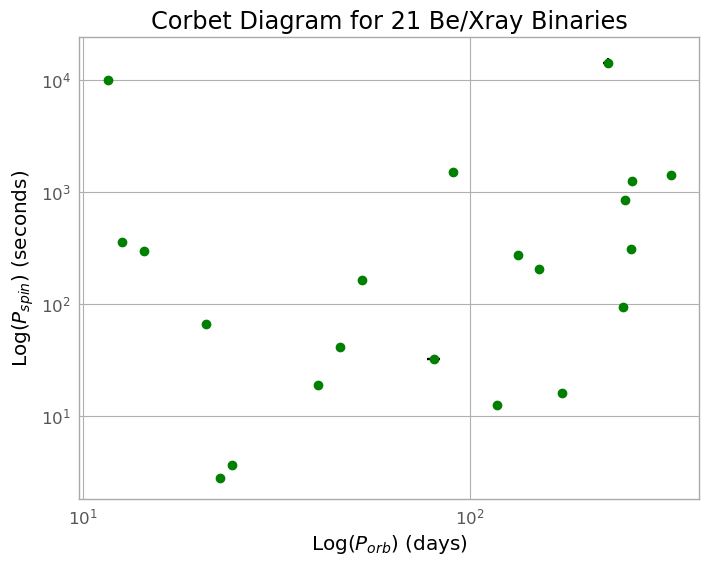

/tmp/ipykernel_18031/3071046089.py:17: RuntimeWarning: divide by zero encountered in log10
  orb_logbins = np.logspace(np.log10(orb_period[0]),np.log10(orb_period[-1]),len(orb_period)).sort()
/tmp/ipykernel_18031/3071046089.py:17: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  orb_logbins = np.logspace(np.log10(orb_period[0]),np.log10(orb_period[-1]),len(orb_period)).sort()
/tmp/ipykernel_18031/3071046089.py:25: RuntimeWarning: divide by zero encountered in log10
  spin_logbins = np.logspace(np.log10(spin_period[0]),np.log10(spin_period[-1]),len(spin_period)).sort()
/tmp/ipykernel_18031/3071046089.py:25: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  spin_logbins = np.logspace(np.log10(spin_period[0]),np.log10(spin_period[-1]),len(spin_period)).sort()


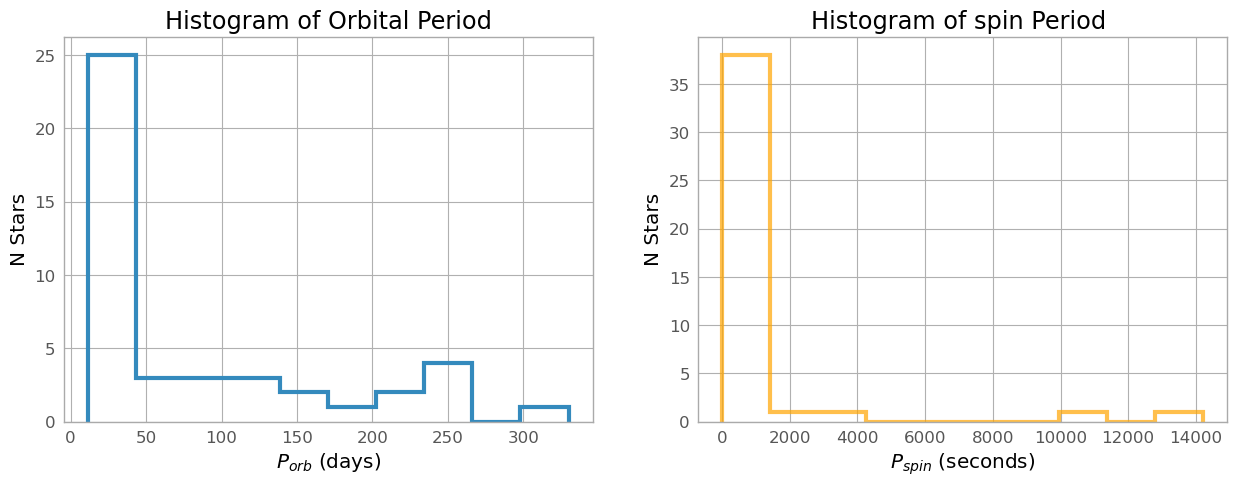

In [98]:
def period_spinperiod(table):
    orb_period = table['Per'] #days
    orb_period_err = table['e_Per'] #days
    spin_period = table['PerSpin'] # seconds
    spin_period_err = table['e_PerSpin']
    
    artist = plt.errorbar(orb_period,spin_period,spin_period_err,orb_period_err,ecolor='k',fmt='o',color='g')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel(r'Log($P_{orb}$) (days)')
    plt.ylabel(r'Log($P_{spin}$) (seconds)')
    #plot N points
    N = np.sum(~orb_period.mask & ~spin_period.mask)
    plt.title(f'Corbet Diagram for {N} Be/Xray Binaries')
    plt.show()
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
    orb_logbins = np.logspace(np.log10(orb_period[0]),np.log10(orb_period[-1]),len(orb_period)).sort()
    orb_bins = np.linspace(orb_period[0],orb_period[-1]).sort()
    ax1.hist(orb_period,bins=orb_bins,histtype='step',linewidth=3.0)
    ax1.set_xlabel(r'$P_{orb}$ (days)')
    ax1.set_ylabel('N Stars')
    ax1.set_title("Histogram of Orbital Period")
    #ax1.set_xscale('log')

    spin_logbins = np.logspace(np.log10(spin_period[0]),np.log10(spin_period[-1]),len(spin_period)).sort()
    spin_bins = np.linspace(spin_period[0],spin_period[-1]).sort()
    ax2.hist(spin_period, bins=spin_bins,alpha=0.7,color='orange',histtype='step',linewidth=3.0)
    ax2.set_xlabel((r'$P_{spin}$ (seconds)'))
    ax2.set_ylabel('N Stars')
    ax2.set_title("Histogram of spin Period ")
    #ax2.set_xscale('log')
    
    plt.show()
    return None
period_spinperiod(Bestars)